<a href="https://colab.research.google.com/github/ahmedyasser7/DEPI_GP/blob/main/NUMBER_OF_CASUALTIES_PREDICTIVE_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NUMBER OF CASUALTIES PREDICTIVE MODEL**

# Uploading The Dataset

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving accident cleaned data.csv to accident cleaned data.csv


# Importing Libraries

In [ ]:
# Importing the necessary Libraries
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np
import matplotlib.pyplot as plt


#Load the Dataset


In [ ]:
# Load the 'accident cleaned data.csv' dataset
data = pd.read_csv('accident cleaned data.csv')


# Check the first few rows
data.head()

,Accident_Index,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Urban_or_Rural_Area
0,200901BS70001,-0.201349,51.512273,2,2,1,2009-01-01,5,15:11:00,12,E09000020,30,1,1,1,0,1
1,200901BS70002,-0.199248,51.514399,2,2,11,2009-01-05,2,10:59:00,12,E09000020,30,1,1,2,0,1
2,200901BS70003,-0.179599,51.486668,3,2,1,2009-01-04,1,14:19:00,12,E09000020,30,1,1,1,0,1
3,200901BS70004,-0.203110,51.507804,2,2,1,2009-01-05,2,08:10:00,12,E09000020,30,1,8,4,0,1
4,200901BS70005,-0.173445,51.482076,2,2,1,2009-01-06,3,17:25:00,12,E09000020,30,4,1,1,0,1


In [ ]:
data.tail()

,Accident_Index,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Urban_or_Rural_Area
898550,2014984136414,-3.417278,55.264773,2,2,1,2014-12-07,1,22:20:00,917,S12000006,70,6,3,3,0,2
898551,2014984137514,-3.230255,55.054855,3,2,2,2014-12-11,5,06:40:00,917,S12000006,70,6,1,3,0,2
898552,2014984137714,-3.230826,54.985668,3,1,1,2014-12-09,3,02:00:00,917,S12000006,40,4,1,4,0,2
898553,2014984138414,-3.191397,54.990446,2,3,2,2014-12-17,4,06:55:00,917,S12000006,60,6,2,2,0,2
898554,2014984139614,-3.348426,55.106700,3,2,2,2014-12-24,4,15:00:00,917,S12000006,60,1,1,2,0,2


# Exploring & Preprocessing the Data

In [ ]:
# Get information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898555 entries, 0 to 898554
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Accident_Index              898555 non-null  object        
 1   Longitude                   898555 non-null  float64       
 2   Latitude                    898555 non-null  float64       
 3   Accident_Severity           898555 non-null  int64         
 4   Number_of_Vehicles          898555 non-null  int64         
 5   Number_of_Casualties        898555 non-null  int64         
 6   Date                        898555 non-null  datetime64[ns]
 7   Day_of_Week                 898555 non-null  int64         
 8   Time                        898555 non-null  object        
 9   Local_Authority_(District)  898555 non-null  int64         
 10  Local_Authority_(Highway)   898555 non-null  object        
 11  Speed_limit                 898555 non-

In [ ]:
data.describe(include='all')

,Accident_Index,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Urban_or_Rural_Area
count,898555,898555.000000,898555.000000,898555.000000,898555.000000,898555.000000,898555,898555.000000,898555,898555.000000,898555,898555.000000,898555.000000,898555.000000,898555.000000,898555.000000,898555.000000
unique,898555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1439,NaN,207,NaN,NaN,NaN,NaN,NaN,NaN
top,200901BS70001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17:00:00,NaN,E10000016,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8889,NaN,25989,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,-1.393471,52.557925,2.838157,1.826297,1.343093,2011-12-07 17:56:00.070779904,4.115010,NaN,350.141962,NaN,38.631375,1.936235,1.551820,1.372541,0.104764,1.349956
min,NaN,-7.516225,49.912941,1.000000,1.000000,1.000000,2009-01-01 00:00:00,1.000000,NaN,1.000000,NaN,10.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,NaN,-2.312257,51.483382,3.000000,1.000000,1.000000,2010-06-01 00:00:00,2.000000,NaN,112.000000,NaN,30.000000,1.000000,1.000000,1.000000,0.000000,1.000000
50%,NaN,-1.335049,52.211135,3.000000,2.000000,1.000000,2011-11-15 00:00:00,4.000000,NaN,325.000000,NaN,30.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,NaN,-0.197891,53.453312,3.000000,2.000000,1.000000,2013-06-21 00:00:00,6.000000,NaN,530.000000,NaN,50.000000,4.000000,1.000000,2.000000,0.000000,2.000000
max,NaN,1.759398,60.662043,3.000000,67.000000,93.000000,2014-12-31 00:00:00,7.000000,NaN,941.000000,NaN,70.000000,7.000000,9.000000,5.000000,7.000000,2.000000


In [ ]:
# Check for missing values
data.isnull().sum()

,0
Accident_Index,0
Longitude,0
Latitude,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0
Date,0
Day_of_Week,0
Time,0
Local_Authority_(District),0


In [ ]:
# Check for duplicate values
data.duplicated().sum()

0

In [ ]:
# Convert Date to datetime
data['Date'] = pd.to_datetime(data['Date'])

## Feature Selection and Scaling

In [ ]:
# Feature selection
features = data[['Number_of_Vehicles', 'Speed_limit', 'Light_Conditions',
                 'Weather_Conditions', 'Road_Surface_Conditions']]
target = data['Number_of_Casualties']

# Feature scaling
scaler = StandardScaler()
numerical_features = ['Number_of_Vehicles', 'Speed_limit',
                     'Light_Conditions', 'Weather_Conditions',
                     'Road_Surface_Conditions']
features[numerical_features] = scaler.fit_transform(features[numerical_features])


<ipython-input-16-60a5e96434fc>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[numerical_features] = scaler.fit_transform(features[numerical_features])


# Model Selection & Training

## Train-Test Split

In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Apply log transformation to the target variable
y_train = np.log1p(y_train)  # Log transformation to handle skewness
y_test = np.log1p(y_test)


## Model Definition and Hyperparameter Tuning

In [ ]:
# Define the XGBoost model and hyperparameters
xgb_model = XGBRegressor()

# Hyperparameter grid for RandomizedSearchCV
params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0]
}

# Perform Randomized Search with Cross-Validation
randomized_search = RandomizedSearchCV(xgb_model, params, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
randomized_search.fit(X_train, y_train)

# Best model
best_xgb_model = randomized_search.best_estimator_


## Model Evaluation

In [ ]:
# Model Evaluation
y_pred = best_xgb_model.predict(X_test)

# Inverse transform the log transformation
y_pred = np.expm1(y_pred)  # Inverse of log1p
y_test_inverse = np.expm1(y_test)  # Inverse of log1p

# Print predicted values
print("Predicted values:", y_pred)

# Calculate mean squared error and RMSE
mse = mean_squared_error(y_test_inverse, y_pred)
rmse = np.sqrt(mse)

# Output the results
print(f"XGBoost Regression - Best Params: {randomized_search.best_params_}")
print(f"RMSE: {rmse:.4f}\n")


Predicted values: [1.2022802 1.1050482 1.1079826 ... 1.3508894 1.1687661 1.0646013]
XGBoost Regression - Best Params: {'subsample': 0.8, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.05, 'colsample_bytree': 1.0}
RMSE: 0.8300



## Confusion Matrix and Classification Report


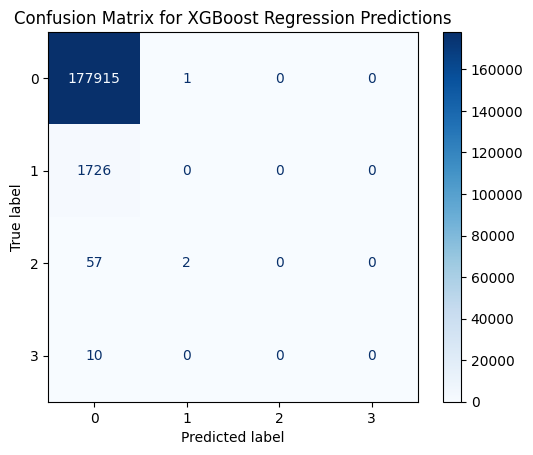

              precision    recall  f1-score   support

         0-1       0.99      1.00      0.99    177916
         1-5       0.00      0.00      0.00      1726
        2-10       0.00      0.00      0.00        59
        3-20       0.00      0.00      0.00        10

    accuracy                           0.99    179711
   macro avg       0.25      0.25      0.25    179711
weighted avg       0.98      0.99      0.99    179711



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Bin the predictions for confusion matrix (modify as needed)
bins = [0, 1, 5, 10, 20, np.inf]  # Define your bins
labels = [0, 1, 2, 3]  # Corresponding labels for the bins
y_test_binned = np.digitize(y_test_inverse, bins) - 1  # Binned true values
y_pred_binned = np.digitize(y_pred, bins) - 1  # Binned predicted values

# Create confusion matrix
cm = confusion_matrix(y_test_binned, y_pred_binned)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for XGBoost Regression Predictions')
plt.show()

# Print the classification report
print(classification_report(y_test_binned, y_pred_binned, target_names=[f'{l}-{bins[i+1]}' for i, l in enumerate(labels)]))


# Save Model

In [ ]:
# Import pickle
import pickle

# Save the model
with open('best_xgboost_model.pkl', 'wb') as file:
    pickle.dump(best_xgb_model, file)
print("Model saved as 'best_xgboost_model.pkl'")


Model saved as 'best_xgboost_model.pkl'
